In [1]:
import matplotlib.pyplot as plt
plt.style.use('belle2')

import os

In [2]:
import uproot
import pandas as pd
import numpy as np
import glob

# Define the pattern to match your files
file_pattern = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v2_241106_yespi0veto/MC15*.root"
file_list = glob.glob(file_pattern)

# Initialize an empty list to hold DataFrames
dataframes = []
branches_all = ["__experiment__", "__run__", "__event__",\
             'Dp_M','Dp_isSignal','Dp_CMS_p','Dp_cosAngleBetweenMomentumAndVertexVector','Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'Dp_acos_cosAngleBetweenMomentumAndVertexVector','Dp_acos_cosAngleBetweenMomentumAndVertexVectorInXYPlane',\
             'etapip_Eta_M','etapip_Eta_isSignal','etapip_Eta_daughterDiffOfPhi_0_1','etapip_Eta_daughterAngle_0_1','etapip_Eta_Easym','etapip_Eta_p',\
             'etapip_Eta_genMotherPDG','etapip_Eta_genMotherID','etapip_gamma1_p','etapip_gamma2_p','etapip_gamma1_clusterNHits','etapip_gamma2_clusterNHits',\
             'etapip_gamma1_clusterReg', 'etapip_gamma2_clusterReg',\
             'Pip_pionID','Pip_pionIDNN','Pip_mcPDG','Pip_dr','Pip_dr','Pip_p',\
             'Pip_genMotherPDG','Pip_genMotherID',\
             'ROE_Mgg','dM_pi0','ROE_Mgg_50MeV','dM_pi0_50MeV','ROE_Mgg_75MeV','dM_pi0_75MeV','ROE_Mgg_mask','dM_pi0_mask',\
             'ROE_Mgg_2','dM_pi0_2','ROE_Mgg_50MeV_2','dM_pi0_50MeV_2','ROE_Mgg_75MeV_2','dM_pi0_75MeV_2','ROE_Mgg_mask_2','dM_pi0_mask_2',\
             'veto_isSignal','veto_isSignal_50MeV','veto_isSignal_75MeV','veto_isSignal_mask',\
             'num_Dstar','num_Dstar_no_nan','CFT_qr','CFT_prob']
# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_gg_K"]

    # Specify the branches you want to extract
    branches = ['Dp_Psum','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg = pd.concat(dataframes, ignore_index=True)

df_bkg = df_bkg.query('Dp_isSignal!=1')
df_bkg = df_bkg.query('(Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')
df_bkg = df_bkg.query('dM_pi0_mask_nonan>0.011 &  dM_pi0_mask_2_nonan>0.011 ')
# df_bkg = df_bkg.query('Dp_M<1.93 | Dp_M>2.02')
# df_bkg = df_bkg.query('abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7')
# df_bkg = df_bkg.query('num_Dstar_no_nan<0 ')

In [3]:
df_bkg = df_bkg.query('num_Dstar_no_nan>0 ')

In [4]:
nan_columns = df_bkg.isnull().any()
print(nan_columns)

Dp_Psum                                               False
dM_pi0_mask_nonan                                     False
dM_pi0_mask_2_nonan                                   False
Pip_genMotherID                                       False
etapip_Eta_genMotherID                                False
Pip_genMotherPDG                                      False
etapip_Eta_genMotherPDG                               False
Dp_cosHelicityAngleMomentum                           False
Pip_dr                                                False
Dp_isSignal                                            True
Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane    False
Pip_p                                                 False
Dp_CMS_p                                              False
etapip_Eta_Easym                                      False
etapip_Eta_p                                          False
CFT_prob                                              False
Dp_M                                    

In [5]:
file_pattern_signal = "/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/DptoetaKp_gg/241106_loose_v2/*.root"
file_list_signal = glob.glob(file_pattern_signal)

file_pattern_signal_cc = "/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15ri_sigMC/DptoetaKp_gg_cc/241106_loose_v2/*.root"
file_list_signal_cc = glob.glob(file_pattern_signal_cc)

file_list_signal += file_list_signal_cc

dataframes_signal = []

for file_name in file_list_signal:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_gg_K"]

    # Specify the branches you want to extract
    #branches = ['Dp_Psum','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names
    # branches = ['Dp_Psum','dM_pi0_mask','dM_pi0_mask_2','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names
    branches = ['Dp_Psum','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names

    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes_signal.append(df_temp)


df_signal = pd.concat(dataframes_signal, ignore_index=True)
df_signal = df_signal.query('Dp_isSignal==1')
df_signal = df_signal.query('dM_pi0_mask_nonan>0.011 &  dM_pi0_mask_2_nonan>0.011 ')
# df_signal = df_signal.query('Dp_M<1.93 | Dp_M>2.02')
# df_bkg = df_bkg.query('(Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')

# df_signal = df_signal.query('abs(etapip_Eta_daughterDiffOfPhi_0_1)<2 & etapip_Eta_daughterAngle_0_1<1.7')
# df_signal = df_signal.query('num_Dstar_no_nan<0')

# Define the new column based on the given formula
# df_signal['momentum_asym'] = (df_signal['etapip_Eta_p'] - df_signal['Pip_p']) / (df_signal['etapip_Eta_p'] + df_signal['Pip_p'])
# df_signal['momentum_sum'] = (df_signal['etapip_Eta_p'] + df_signal['Pip_p'])

In [6]:
df_signal = df_signal.query('num_Dstar_no_nan>0')


In [7]:
# df_signal['Dp_Psum'] = (df_signal['etapip_Eta_p'] + df_signal['Pip_p'])

In [8]:
nan_columns = df_signal.isnull().any()
print(nan_columns)

Dp_Psum                                               False
dM_pi0_mask_nonan                                     False
dM_pi0_mask_2_nonan                                   False
Pip_genMotherID                                       False
etapip_Eta_genMotherID                                False
Pip_genMotherPDG                                      False
etapip_Eta_genMotherPDG                               False
Dp_cosHelicityAngleMomentum                           False
Pip_dr                                                False
Dp_isSignal                                           False
Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane    False
Pip_p                                                 False
Dp_CMS_p                                              False
etapip_Eta_Easym                                      False
etapip_Eta_p                                          False
CFT_prob                                              False
Dp_M                                    

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Ensure the signal and background datasets are balanced
min_size = min(len(df_signal), len(df_bkg))

# Sample an equal number of rows from both signal and background
df_signal_balanced = df_signal.sample(n=min_size, random_state=42)
df_bkg_balanced = df_bkg.sample(n=min_size, random_state=42)

# Assign labels: signal=1, background=0
df_signal_balanced['label'] = 1
df_bkg_balanced['label'] = 0

# Concatenate the signal and background datasets
df_combined = pd.concat([df_signal_balanced, df_bkg_balanced], ignore_index=True)

# Shuffle the combined dataset
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Drop the specified columns
columns_to_drop = ['dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_isSignal','Dp_CMS_p','CFT_prob', 'Dp_M', 'Pip_p', 'etapip_Eta_p', 'num_Dstar_no_nan','etapip_Eta_daughterAngle_0_1'] 
                   # 'etapip_Eta_daughterDiffOfPhi_0_1', 'etapip_Eta_daughterAngle_0_1']
df_combined = df_combined.drop(columns=columns_to_drop)

In [10]:
df_combined.head()

,Dp_Psum,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,etapip_Eta_Easym,etapip_Eta_daughterDiffOfPhi_0_1,label
0,3.321491,0.860769,0.001612,-0.999987,0.511948,2.472971,0
1,3.600121,0.165280,0.002747,0.999689,0.844981,-1.009844,0
2,2.538873,-0.675946,0.020087,0.999846,0.565055,-0.724501,1
3,3.888535,0.121153,0.000579,0.997174,0.872655,0.505873,0
4,3.027905,-0.981497,0.015728,-0.999999,0.578388,0.307132,0


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


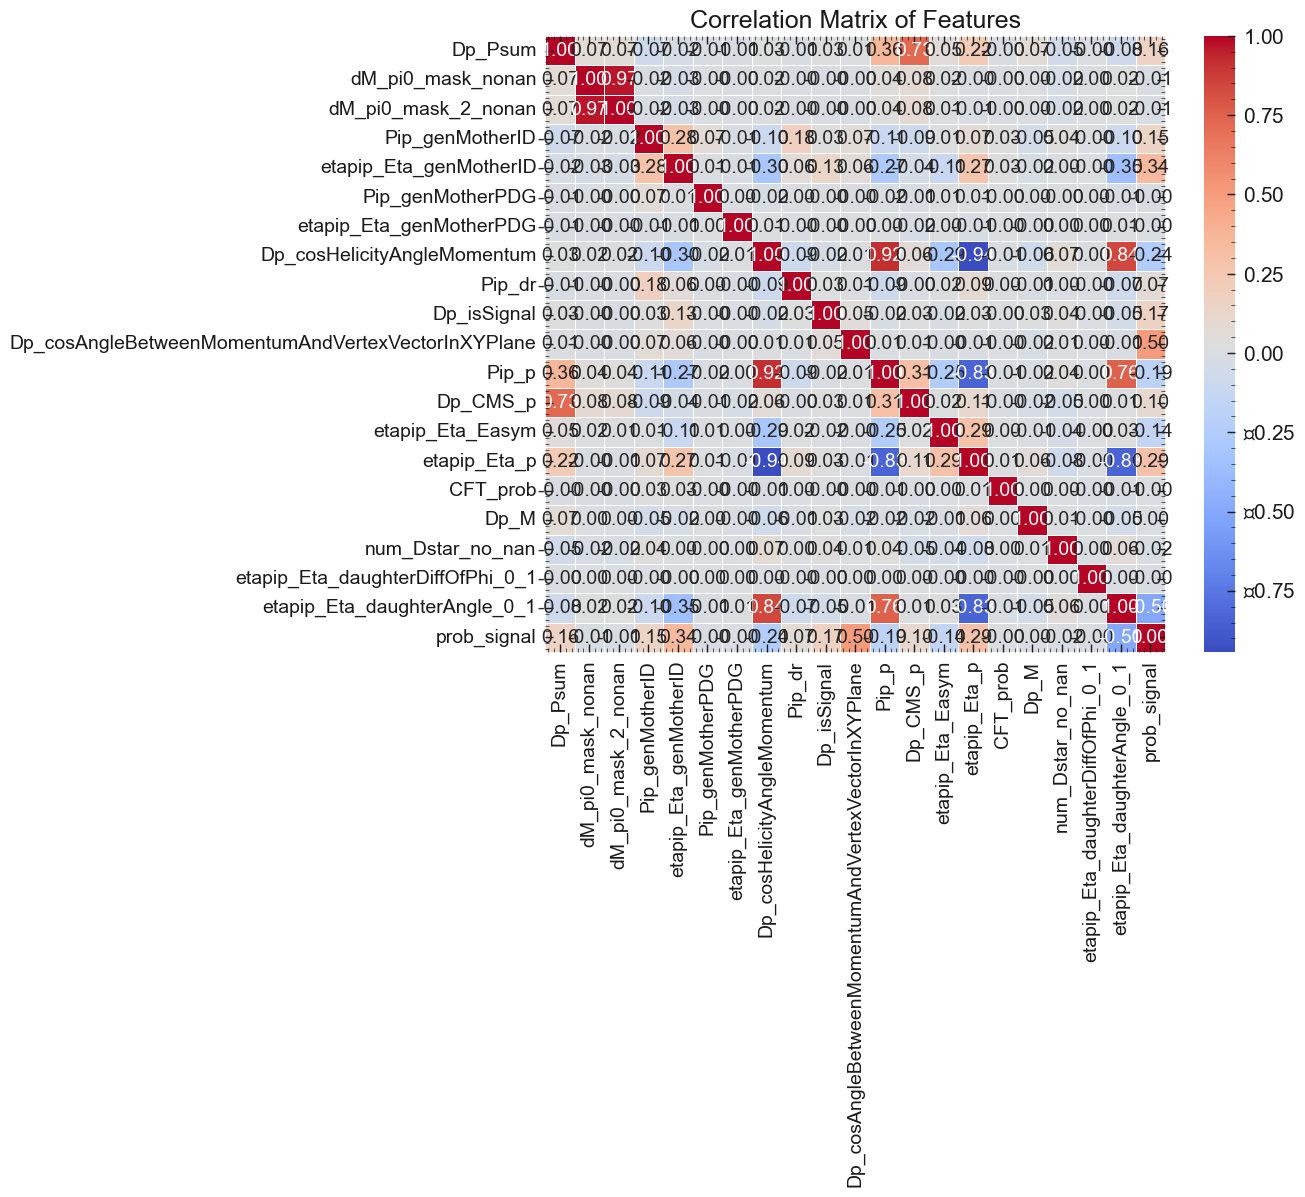

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
# # Rename the features
# feature_names = {
#     'Pip_dr': r'$dr(\pi^+)$',
#     'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane': r'$\cos \theta_{XY}$',
#     'etapip_Eta_Easym': r'$|\frac{E_{\gamma_1} - E_{\gamma_2} }{E_{\gamma_1} + E_{\gamma_2}}|$',
#     'etapip_Eta_daughterDiffOfPhi_0_1': r'$\Delta \phi (\gamma_1,\gamma_2)$',
#     'momentum_asym': r'$\frac{p(\eta)-p(\pi^+)}{p(\eta)+p(\pi^+)}$',
#     'Dp_cosHelicityAngleMomentum': r'cosHel$(D^+)$'
# }

# # Apply the renaming
# df_combined.rename(columns=feature_names, inplace=True)

# Compute the correlation matrix
corr_matrix = df_combined.drop(columns=['label']).corr()

# Plot the correlation matrix with larger annotation text
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, 
            annot_kws={"size": 14})  # Increase the size of the correlation numbers

# Set the title and label sizes
plt.title('Correlation Matrix of Features', fontsize=18)  # Title size
plt.xticks(fontsize=14)  # X-axis label size
plt.yticks(fontsize=14)  # Y-axis label size

# # Ensure the path is expanded correctly
# save_path = os.path.expanduser('~/PLOTS/DNN/belle2_etapip_gg_correlation_240919_coshel_momentum.png')

# plt.tight_layout()
# # Save the figure
# plt.savefig(save_path)


plt.show()


In [11]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df_combined.drop(columns='label')
y = df_combined['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# import joblib
# model_file = "best_xgb_model_etapip_gg_K.pkl"
# best_xgb_model = joblib.load(model_file)

In [13]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Separate features and target
X = X_train
y = y_train

# Define the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X, y)

# Get the best model and its parameters
best_xgb_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Save the best model if needed
import joblib
joblib.dump(best_xgb_model, 'best_xgb_model_etapip_gg_K_loose_v2_tagged.pkl')

# xgb_model.fit(X,y)
# best_xgb_model = xgb_model


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/jykim/anaconda3/envs/draw/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.8385274067444459


['best_xgb_model_etapip_gg_K_loose_v2_tagged.pkl']

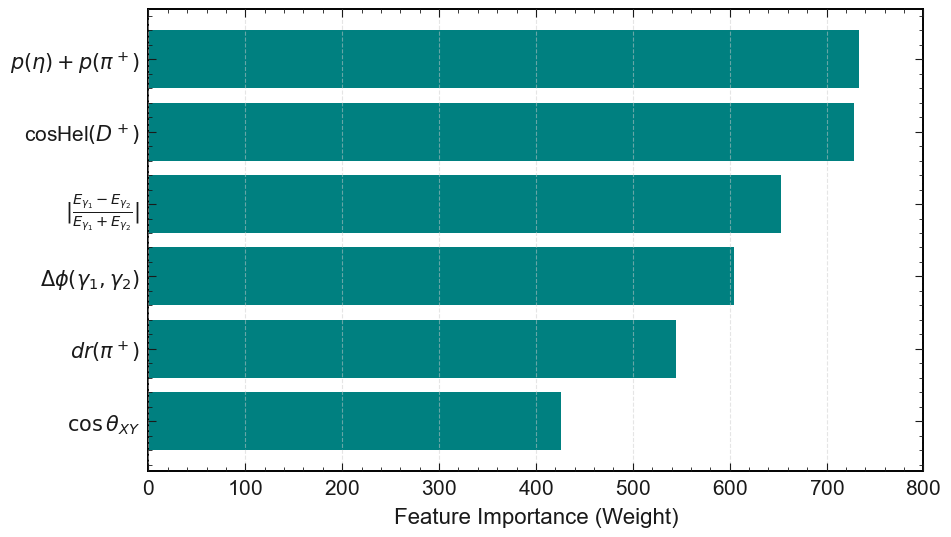

In [16]:
# Extract the underlying Booster object from the trained XGBClassifier
booster = best_xgb_model.get_booster()

# Get the feature importances with 'weight'
importance_dict = booster.get_score(importance_type='weight')

# The rest of the code remains the same
import pandas as pd

# Rename the features for display
feature_names = {
    'Pip_dr': r'$dr(\pi^+)$',
    'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane': r'$\cos \theta_{XY}$',
    'etapip_Eta_Easym': r'$|\frac{E_{\gamma_1} - E_{\gamma_2} }{E_{\gamma_1} + E_{\gamma_2}}|$',
    'Dp_Psum': r'$p(\eta)+p(\pi^+)$',
    'etapip_Eta_daughterDiffOfPhi_0_1': r'$\Delta \phi (\gamma_1,\gamma_2)$',
    'Dp_cosHelicityAngleMomentum': r'cosHel$(D^+)$'
}

# Convert to a DataFrame for easier manipulation
importance_df = pd.DataFrame.from_dict(importance_dict, orient='index', columns=['Weight'])
importance_df.index = [feature_names.get(f, f) for f in importance_df.index]  # Rename using LaTeX labels
importance_df = importance_df.sort_values(by='Weight', ascending=False)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df.index, importance_df['Weight'], color='teal')
plt.xlabel('Feature Importance (Weight)', fontsize=16)
# plt.title('Feature Importances with Customized Labels', fontsize=14)
plt.gca().invert_yaxis()  # Show the most important feature on top
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.savefig("MC15ri_etapip_gg_K_importance_loose_v2_tagged.png")

# Show plot
plt.show()


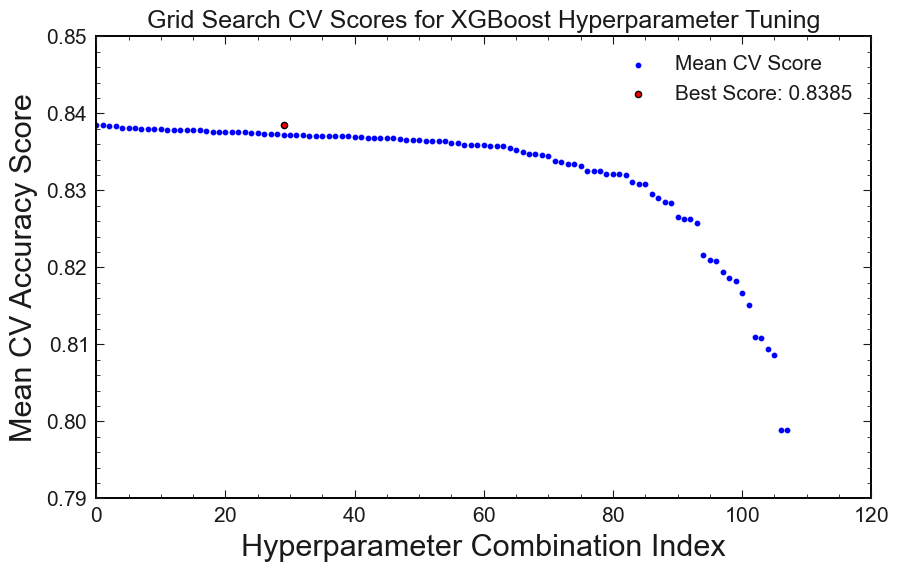

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract all mean cross-validation scores and parameter combinations
results_df = pd.DataFrame(grid_search.cv_results_)

# Sort results by mean test score in descending order
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Highlight the best score
best_score = grid_search.best_score_

# Plotting the scores using Matplotlib
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(
    range(len(results_df)),
    results_df['mean_test_score'],
    c='blue',  # Color for the points
    s=10,
    marker='o',
    label='Mean CV Score'
)

# Highlighting the best score
best_index = results_df['mean_test_score'].idxmax()
plt.scatter(best_index, best_score, color='red', s=20, label=f'Best Score: {best_score:.4f}', edgecolor='black')

# Adding labels and legend
plt.title("Grid Search CV Scores for XGBoost Hyperparameter Tuning")
plt.xlabel("Hyperparameter Combination Index")
plt.ylabel("Mean CV Accuracy Score")
plt.legend()
plt.xlim(0,)
# Save the figure
plt.savefig("MC15ri_etapip_gg_K_gridsearch_loose_v2_tagged.png")

# Show the plot
plt.show()


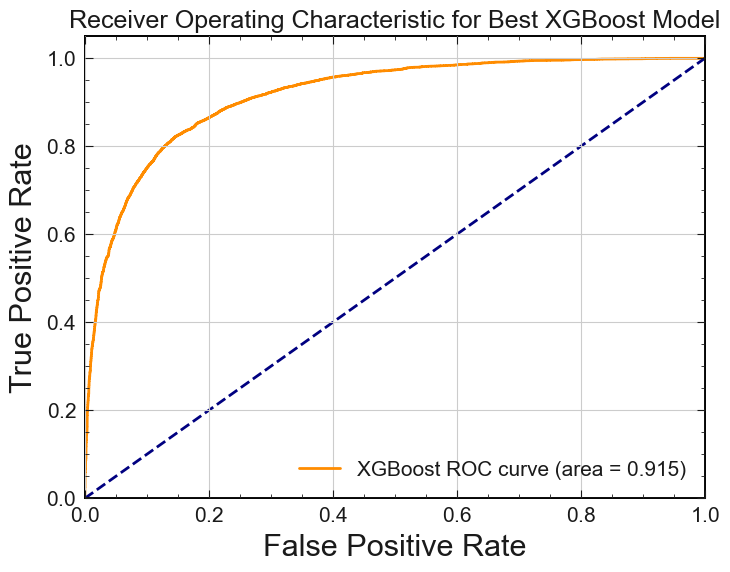

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost ROC curve (area = {roc_auc_xgb:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Best XGBoost Model')
plt.legend(loc='lower right')
plt.grid(True)

# Uncomment the following lines to save the plot
# save_path = '~/PLOTS/XGBoost/240919_ROC_xgb.png'
# save_path_full = os.path.expanduser(save_path)
# plt.savefig(save_path_full)
plt.savefig("MC15ri_etapip_gg_K_roc_loose_v2_tagged.png")

plt.show()

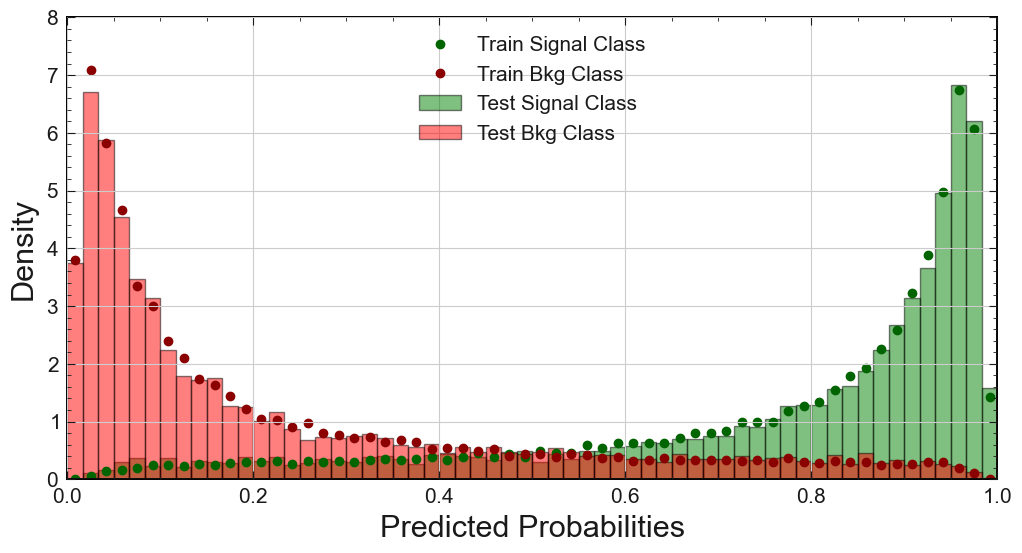

In [19]:
# Get predicted probabilities
y_train_probs = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_probs = best_xgb_model.predict_proba(X_test)[:, 1]

import matplotlib.pyplot as plt
import numpy as np

# Function to plot histograms for train (as points) and test (as bars)
def plot_probability_histograms(y_train_true, y_train_probs, y_test_true, y_test_probs):
    plt.figure(figsize=(12, 6))
    
    # Define a common set of bins for both train and test
    bins = np.linspace(0, 1, 61)  # 60 bins from 0 to 1 for predicted probabilities

    # Test set: Plot histograms as bars
    plt.hist(y_test_probs[y_test_true == 1], bins=bins, alpha=0.5, label='Test Signal Class', color='green', edgecolor='black', density=True)
    plt.hist(y_test_probs[y_test_true == 0], bins=bins, alpha=0.5, label='Test Bkg Class', color='red', edgecolor='black', density=True)

    # Train set: Calculate histogram values for points
    hist_train_pos, _ = np.histogram(y_train_probs[y_train_true == 1], bins=bins, density=True)
    hist_train_neg, _ = np.histogram(y_train_probs[y_train_true == 0], bins=bins, density=True)

    # Calculate the bin centers (to place the points in the middle of each bin)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    # Plot the train set histograms as points
    plt.plot(bin_centers, hist_train_pos, 'o', label='Train Signal Class', color='darkgreen')
    plt.plot(bin_centers, hist_train_neg, 'o', label='Train Bkg Class', color='darkred')

    # Labels, title, and legend
    plt.xlabel('Predicted Probabilities')
    plt.ylabel('Density')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlim(0,1)

# Calculate predicted probabilities for the training and test sets
y_train_probs = best_xgb_model.predict_proba(X_train)[:, 1]
y_test_probs = best_xgb_model.predict_proba(X_test)[:, 1]

# Plot histograms with train set as points and test set as bars
plot_probability_histograms(
    y_train, y_train_probs,
    y_test, y_test_probs
)

# save_path = '~/PLOTS/HBDT/240919_outputs_momentum_sum.png'
# save_path_full = os.path.expanduser(save_path)

# plt.savefig(save_path_full)
plt.savefig("train_test_etapip_gg_K_loose_v2_tagged.png")
plt.show()


In [20]:
import uproot
import pandas as pd
import numpy as np
import glob

# Define the pattern to match your files
file_pattern = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15ri/etapip_eteeta/MC15ri_etaetapip_loose_v2_241106_yespi0veto/MC15*.root"
file_list = glob.glob(file_pattern)
# Initialize an empty list to hold DataFrames
dataframes = []

# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_gg_K"]

    # Specify the branches you want to extract, including 'Dp_M'
    branches = ['Dp_Psum','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names
    
    # Convert the selected branches to a Pandas DataFrame
    df_temp = tree.arrays(branches, library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg_apply = pd.concat(dataframes, ignore_index=True)

df_bkg_apply = df_bkg_apply.query('dM_pi0_mask_nonan>0.011 &  dM_pi0_mask_2_nonan>0.011 ')

# df_bkg_apply['momentum_sum'] = (df_bkg_apply['etapip_Eta_p'] + df_bkg_apply['Pip_p'])
# df_bkg_apply['log10_Pip_dr'] = np.log10(df_bkg_apply['Pip_dr'])
# Apply your filter
# df_bkg_apply = df_bkg_apply.query('(Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')



In [21]:
# Separate signal and background data
df_isSignal_true = df_bkg_apply.query('Dp_isSignal==1')
df_isSignal_false = df_bkg_apply.query('Dp_isSignal!=1')




In [22]:
df_isSignal_false

,Dp_Psum,dM_pi0_mask_nonan,dM_pi0_mask_2_nonan,Pip_genMotherID,etapip_Eta_genMotherID,Pip_genMotherPDG,etapip_Eta_genMotherPDG,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_isSignal,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,Pip_p,Dp_CMS_p,etapip_Eta_Easym,etapip_Eta_p,CFT_prob,Dp_M,num_Dstar_no_nan,etapip_Eta_daughterDiffOfPhi_0_1,etapip_Eta_daughterAngle_0_1
0,3.579478,0.011748,0.254342,2.0,15.0,23.0,-431.0,-0.777763,0.001931,0.0,-0.999623,0.629584,2.550247,0.631551,2.949894,0.852014,1.921990,-1.0,0.276567,0.475489
1,3.483770,0.625951,0.324823,8.0,2.0,421.0,23.0,-0.476483,0.000656,0.0,0.988579,1.069679,3.293325,0.347552,2.414091,0.201195,1.780073,-1.0,0.123133,0.476556
2,4.407762,0.072126,0.280791,8.0,0.0,4122.0,0.0,0.793137,0.002698,NaN,0.999727,3.650176,3.562596,0.637977,0.757585,0.892743,1.985589,-1.0,1.249601,1.729635
3,2.949035,0.037805,0.231300,10.0,0.0,421.0,0.0,0.110348,0.020886,NaN,0.999997,1.567412,2.687799,0.783907,1.381623,0.848145,1.606164,-1.0,-1.263416,1.271286
4,4.428832,0.011895,0.051416,9.0,0.0,421.0,0.0,0.890322,0.000918,NaN,0.999698,3.897263,3.702578,0.125788,0.531569,0.016558,2.022544,-1.0,-2.186351,1.617557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6672447,3.763433,0.025991,0.062204,8.0,0.0,24.0,0.0,0.817562,0.006229,0.0,0.999995,3.085016,3.175145,0.495930,0.678417,0.212033,1.691321,-1.0,-2.690462,1.617762
6672448,7.344090,0.040574,0.153092,5.0,0.0,-15.0,0.0,0.961449,0.002582,NaN,-0.999999,6.441765,5.654699,0.761029,0.902326,0.067598,1.695564,-1.0,0.352429,1.854685
6672449,6.230748,0.062150,0.068192,6.0,0.0,-15.0,0.0,0.995631,0.001763,NaN,-0.999988,5.783901,4.871027,0.576913,0.446847,0.039345,1.915157,-1.0,2.130219,2.498396
6672450,4.272149,0.102806,0.020412,10.0,0.0,24.0,0.0,0.930737,0.000704,NaN,-0.999984,3.862863,3.342851,0.034665,0.409286,0.433237,2.014547,-1.0,3.055033,1.859968


In [23]:
# Drop the specified columns, but keep 'Dp_M' for reference
columns_to_drop = ['Dp_CMS_p','CFT_prob','etapip_Eta_daughterAngle_0_1','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','etapip_Eta_p','Pip_p','num_Dstar_no_nan','Dp_M','Pip_genMotherID', 'etapip_Eta_genMotherID', 'Pip_genMotherPDG', 'Dp_isSignal', 'etapip_Eta_genMotherPDG']
df_isSignal_true_dropped = df_isSignal_true.drop(columns=columns_to_drop)
df_isSignal_false_dropped = df_isSignal_false.drop(columns=columns_to_drop)



In [24]:
df_isSignal_true_dropped

,Dp_Psum,Dp_cosHelicityAngleMomentum,Pip_dr,Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane,etapip_Eta_Easym,etapip_Eta_daughterDiffOfPhi_0_1
49,3.792132,0.007059,0.024692,0.999963,0.632933,0.301678
366,3.685748,0.047269,0.019173,0.999999,0.823672,1.135048
393,3.911471,-0.599716,0.002286,-0.999975,0.196187,-0.391843
2492,3.373080,-0.536999,0.014864,-0.999999,0.562687,-0.500206
3563,4.085689,0.636990,0.009658,0.999999,0.505652,-1.168988
...,...,...,...,...,...,...
2526936,3.750551,-0.565770,0.063220,1.000000,0.198825,0.411434
5260358,2.641600,-0.982168,0.085888,-0.999997,0.718832,-0.018506
5272118,2.770662,-0.301520,0.073208,0.999994,0.786826,1.033362
5317767,3.254929,0.000317,0.016466,0.999933,0.396224,-0.038796


In [25]:
# Reorder the columns of df_isSignal_true_dropped and df_isSignal_false_dropped to match the training data's feature order
df_isSignal_true_dropped = df_isSignal_true_dropped[best_xgb_model.get_booster().feature_names]
df_isSignal_false_dropped = df_isSignal_false_dropped[best_xgb_model.get_booster().feature_names]

# Now try to predict probabilities
isSignal_true_probabilities = best_xgb_model.predict_proba(df_isSignal_true_dropped)
df_isSignal_true_dropped['prob_signal'] = isSignal_true_probabilities[:, 1]

isSignal_false_probabilities = best_xgb_model.predict_proba(df_isSignal_false_dropped)
df_isSignal_false_dropped['prob_signal'] = isSignal_false_probabilities[:, 1]


In [26]:
# # Predict probabilities for both datasets
# isSignal_true_probabilities = best_xgb_model.predict_proba(df_isSignal_true_dropped)
# df_isSignal_true_dropped['prob_signal'] = isSignal_true_probabilities[:, 1]  # Probability of the positive class (signal)

# isSignal_false_probabilities = best_xgb_model.predict_proba(df_isSignal_false_dropped)
# df_isSignal_false_dropped['prob_signal'] = isSignal_false_probabilities[:, 1]  # Probability of the positive class (signal)

# # Optionally, you can combine the datasets back with 'Dp_M' if needed
# df_isSignal_true_combined = pd.merge(df_isSignal_true, df_isSignal_true_dropped[['prob_signal']], left_index=True, right_index=True)
# df_isSignal_false_combined = pd.merge(df_isSignal_false, df_isSignal_false_dropped[['prob_signal']], left_index=True, right_index=True)

In [27]:
# Optionally, you can combine the datasets back with 'Dp_M' if needed
df_isSignal_true_combined = pd.merge(df_isSignal_true, df_isSignal_true_dropped[['prob_signal']], left_index=True, right_index=True)
df_isSignal_false_combined = pd.merge(df_isSignal_false, df_isSignal_false_dropped[['prob_signal']], left_index=True, right_index=True)


In [28]:
# Prepare the data
df_combined_all_range = pd.concat([df_isSignal_true_combined, df_isSignal_false_combined], ignore_index=True)

df_combined_all_range['Dp_isSignal'] = df_combined_all_range['Dp_isSignal'].fillna(0)

In [29]:
df_combined_all_range = df_combined_all_range.query('num_Dstar_no_nan>0')

In [30]:
df_combined_all_range.columns.tolist()

['Dp_Psum',
 'dM_pi0_mask_nonan',
 'dM_pi0_mask_2_nonan',
 'Pip_genMotherID',
 'etapip_Eta_genMotherID',
 'Pip_genMotherPDG',
 'etapip_Eta_genMotherPDG',
 'Dp_cosHelicityAngleMomentum',
 'Pip_dr',
 'Dp_isSignal',
 'Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane',
 'Pip_p',
 'Dp_CMS_p',
 'etapip_Eta_Easym',
 'etapip_Eta_p',
 'CFT_prob',
 'Dp_M',
 'num_Dstar_no_nan',
 'etapip_Eta_daughterDiffOfPhi_0_1',
 'etapip_Eta_daughterAngle_0_1',
 'prob_signal']

In [31]:
df_combined = df_combined_all_range.query('Dp_M>1.83 & Dp_M<1.89')

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


Best cut value: 0.77
Best figure of merit: 11.208073653963902


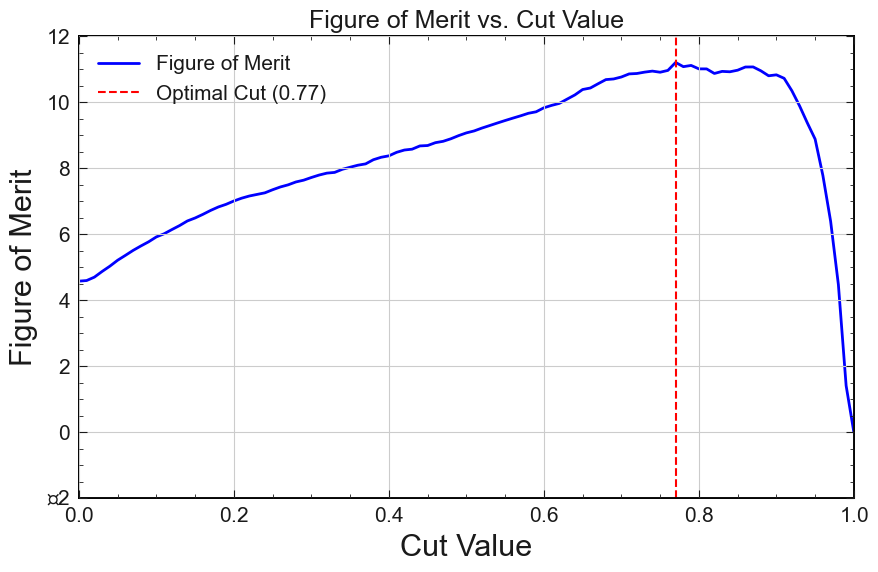

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the figure of merit function using query
def figure_of_merit(df, cut_value):
    df_cut = df.query('prob_signal > @cut_value')
    Nsig = (df_cut['Dp_isSignal'] == 1).sum()
    Nbkg = (df_cut['Dp_isSignal'] != 1).sum()
    if Nsig + Nbkg == 0:
        return 0
    return Nsig / np.sqrt(Nsig + Nbkg)

# Define range of cut values to test
cut_values = np.linspace(0, 1, 101)  # You can adjust the range and granularity

# Calculate figure of merit for each cut value
figures_of_merit = [figure_of_merit(df_combined, cut) for cut in cut_values]

# Find the best cut value
best_cut = cut_values[np.argmax(figures_of_merit)]
best_fom = max(figures_of_merit)

# Print the best cut value and corresponding figure of merit
print(f'Best cut value: {best_cut}')
print(f'Best figure of merit: {best_fom}')

# Plot figure of merit vs. cut value
plt.figure(figsize=(10, 6))
plt.plot(cut_values, figures_of_merit, color='blue', label='Figure of Merit', linewidth=2)
plt.axvline(x=best_cut, color='red', linestyle='--', label=f'Optimal Cut ({best_cut:.2f})')
plt.xlabel('Cut Value')
plt.ylabel('Figure of Merit')
plt.title('Figure of Merit vs. Cut Value')
plt.xlim(0,1)
plt.legend()
plt.grid(True)
plt.savefig("MC15ri_etapip_gg_K_FOM_loose_v2_tagged.png")

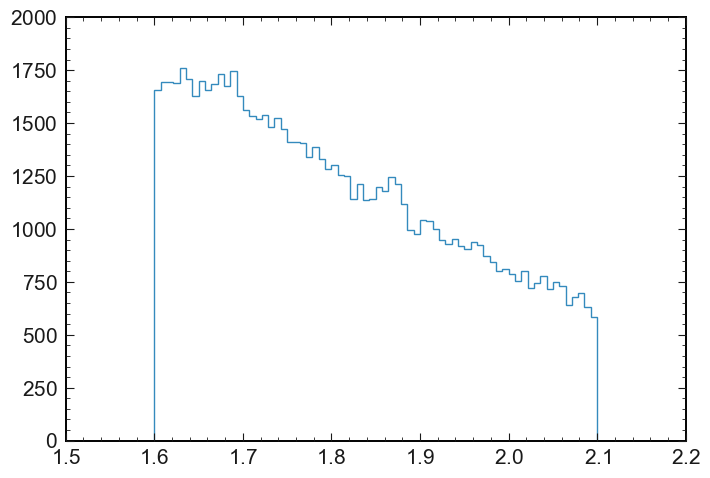

In [33]:
plt.hist(df_combined_all_range['Dp_M'],bins=np.linspace(1.6,2.1,71),histtype='step');

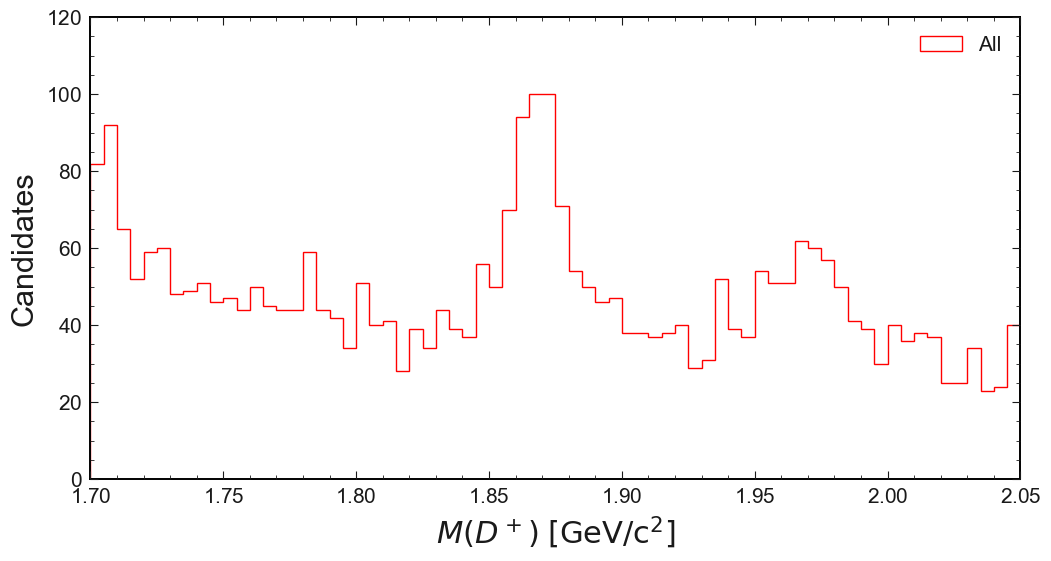

nsig=317
nsig=135.359


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_combined and best_cut are already defined
# For example purposes, I'll include a placeholder for df_combined
# df_combined = pd.read_csv('your_data.csv')  # Load your data here

# Define the optimal cut (replace with the actual value from your previous code)
optimal_cut = best_cut

# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('prob_signal > @optimal_cut')
# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='red', label='All')

# Histogram for background
# plt.hist(df_background['Dp_M'], bins=np.linspace(1.6, 2.1, 71), histtype='step', color='red', label='Background')

plt.xlabel('Dp_M')
plt.ylabel('Candidates')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)
plt.xlim(1.7,2.05)
plt.xlabel(r'$M(D^+) \; [\mathrm{GeV/c^2}]$')

plt.savefig("MC15ri_etapip_gg_K_Dp_M_all_loose_v2_tagged.png")

plt.show()


scale = 427/1000
df_signal_matched_true = df_signal.query('Dp_isSignal==1')
print(f'nsig={len(df_signal_matched_true)}')
print(f'nsig={len(df_signal_matched_true)*scale}')

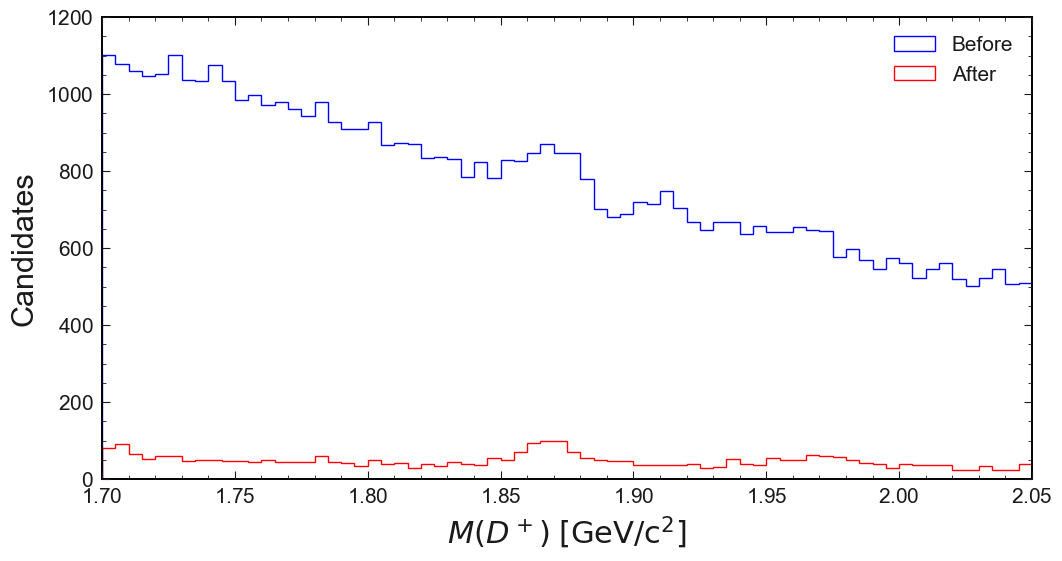

nsig=83154
nsig=35506.758


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume df_combined and best_cut are already defined
# For example purposes, I'll include a placeholder for df_combined
# df_combined = pd.read_csv('your_data.csv')  # Load your data here

# Define the optimal cut (replace with the actual value from your previous code)
optimal_cut = best_cut

# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('prob_signal > 0')
df_background = df_combined_all_range.query('prob_signal > @optimal_cut')

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='blue', label='Before')

# Histogram for background
plt.hist(df_background['Dp_M'], bins=np.linspace(1.7, 2.05, 71), histtype='step', color='red', label='After')

plt.xlabel('Dp_M')
plt.ylabel('Candidates')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)

plt.xlabel(r'$M(D^+) \; [\mathrm{GeV/c^2}]$')
plt.xlim(1.7,2.05)
plt.savefig("MC15ri_etapip_gg_K_Dp_M_before_after_loose_v2_tagged.png")

plt.show()


scale = 427/1000
print(f'nsig={len(df_signal)}')
print(f'nsig={len(df_signal)*scale}')

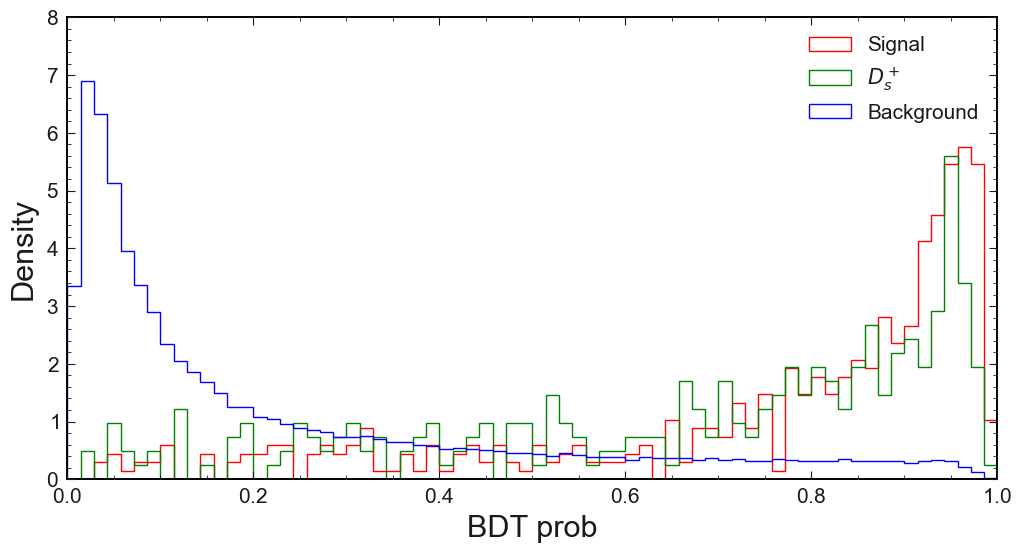

nsig=474


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Separate the dataframe based on the optimal cut
df_signal = df_combined_all_range.query('Dp_isSignal==1')
df_background = df_combined_all_range.query('Dp_isSignal!=1 & (Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')
df_background_Ds = df_combined_all_range.query('Dp_isSignal!=1 & (Pip_genMotherID==etapip_Eta_genMotherID) & abs(Pip_genMotherPDG)==431 & abs(etapip_Eta_genMotherPDG)==431')

# Create histograms
plt.figure(figsize=(12, 6))

# Histogram for signal
plt.hist(df_signal['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='red', label='Signal',density=True)
plt.hist(df_background_Ds['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='green', label='$D_s^+$',density=True)

# Histogram for background
plt.hist(df_background['prob_signal'], bins=np.linspace(0,1, 71), histtype='step', color='blue', label='Background',density=True)

plt.xlabel('BDT prob')
plt.ylabel('Density')
# plt.title('Histogram of Dp_M for Signal and Background')
plt.legend()

# plt.grid(True)
plt.xlim(0,1)
plt.savefig("MC15ri_etapip_gg_K_BDT_output_Dp_Ds_bkg_loose_v2_tagged.png")

plt.show()


print(f'nsig={len(df_signal)}')